### Import Libraries:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import sklearn

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv("sap_stock.txt")

In [4]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()

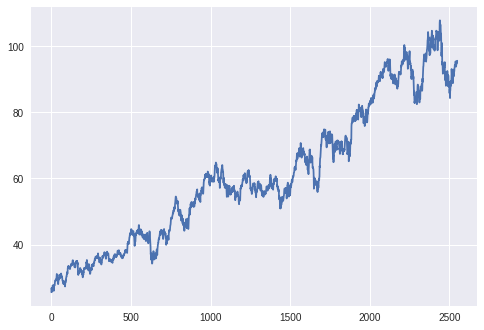

In [5]:
plt.plot(df["index"], df["Close"])
plt.show()

### Prepare the Dataset:

In [6]:
train, test = train_test_split(df, test_size=0.20)
train.shape, test.shape

((2040, 2), (510, 2))

In [7]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [8]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

### Augment Higher-Order Features:

In [9]:
def augment(x, k):
    augmented = []
    for ix in range(k):
        augmented.append(x[:, 0] ** (1 + ix))
    return np.stack(augmented, axis=1)

In [10]:
X_train = augment(X_train, 5)

### Create Model:

In [11]:
# create model:
model = LinearRegression()

# model train:
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

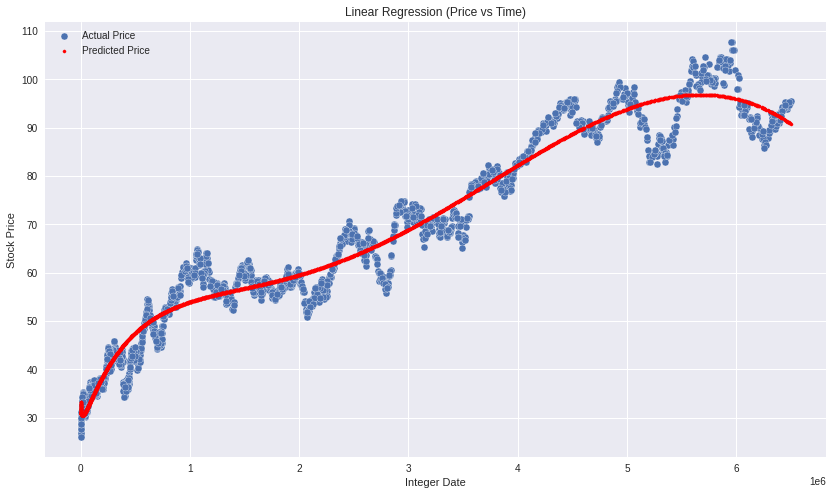

In [12]:
plt.figure(1, figsize=[14, 8])

plt.title('Linear Regression (Price vs Time)')

# plot points:
plt.scatter(X_train[:, 1], y_train, edgecolor='w', label='Actual Price')

# plot regression line:
plt.scatter(X_train[:, 1], model.predict(X_train), color='r', s=10, label='Predicted Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.legend()
plt.show()

### Prediction from our Model

In [13]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [14]:
X_test = augment(X_test, 5)

In [15]:
y_pred = model.predict(X_test)

### Model Evaluation:

In [16]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9647973430427765

In [17]:
scores = {
    "r2": sklearn.metrics.r2_score(y_test, y_pred),
    "mae": sklearn.metrics.mean_absolute_error(y_test, y_pred),
    "mse": sklearn.metrics.mean_squared_error(y_test, y_pred),
    "explained_variance": sklearn.metrics.explained_variance_score(y_test, y_pred)
}

scores

{'r2': 0.9647973430427765,
 'mae': 3.151828580131429,
 'mse': 16.16869242132736,
 'explained_variance': 0.9648065790006041}